<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F1_Standardization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Feature Engineering

Feature Engineering is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. It's a critical step in the machine learning pipeline, often more impactful than the choice of algorithm itself.

**Why is it important?**
*   **Improved Model Performance:** Well-engineered features can help models better understand the underlying patterns in the data, leading to higher accuracy and better generalization.
*   **Better Interpretability:** Some engineered features can make the model's decisions more understandable.
*   **Reduced Overfitting:** Creating relevant features can sometimes simplify the model and reduce overfitting.

**Common Techniques:**
*   **Creating interaction terms:** Multiplying or adding two or more features together.
*   **Polynomial features:** Transforming existing features into polynomial forms (e.g., squaring a feature).
*   **Binning/Discretization:** Grouping continuous data into discrete bins.
*   **One-hot encoding:** Converting categorical variables into a numerical format.
*   **Extracting date/time components:** From a timestamp, extracting day of week, month, year, hour, etc.
*   **Text feature extraction:** Converting text into numerical representations (e.g., TF-IDF, word embeddings).
*   **Aggregations:** Summarizing data (e.g., mean, sum, count) over specific groups or time windows.
*   **Handling missing values:** Imputing or creating indicator features for missingness.

The goal is to transform the raw data into a set of features that are more representative of the problem at hand and more suitable for the machine learning model.

In [ ]:
# Example of Feature Engineering (assuming 'df' is your DataFrame)

# Let's say you have a 'date' column and a 'price' column.
# You can engineer new features like:

import pandas as pd

# Create a dummy DataFrame for demonstration
data = {
    'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-15']),
    'price': [100, 105, 98, 110],
    'category': ['A', 'B', 'A', 'C']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

# 1. Extracting date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6

# 2. Creating a simple interaction term (if applicable)
# Example: if you had 'quantity' and 'unit_price', you could create 'total_revenue'
# df['total_revenue'] = df['quantity'] * df['unit_price']

# 3. One-hot encoding a categorical feature
df = pd.get_dummies(df, columns=['category'], prefix='cat', dtype=int)

# Display the DataFrame with new features
print("\nDataFrame after Feature Engineering:")
display(df)

Original DataFrame:


,date,price,category
0,2023-01-01,100,A
1,2023-01-02,105,B
2,2023-01-03,98,A
3,2023-02-15,110,C



DataFrame after Feature Engineering:


,date,price,year,month,day_of_week,cat_A,cat_B,cat_C
0,2023-01-01,100,2023,1,6,1,0,0
1,2023-01-02,105,2023,1,0,0,1,0
2,2023-01-03,98,2023,1,1,1,0,0
3,2023-02-15,110,2023,2,2,0,0,1


## Feature Scaling

Feature Scaling is a data preprocessing technique used to standardize or normalize the range of independent variables (features) within a dataset. In simpler terms, it's about transforming the values of numeric features so that they are on a similar scale.

**Why is it important?**
*   **Algorithm Performance:** Many machine learning algorithms (e.g., K-Nearest Neighbors, Support Vector Machines, Logistic Regression, Neural Networks) calculate distances between data points or rely on gradient descent. If features have vastly different scales, features with larger values might dominate the distance calculation or gradient updates, leading to suboptimal model performance.
*   **Faster Convergence:** For algorithms that use gradient descent (like neural networks), scaling can lead to faster convergence of the optimization algorithm.
*   **Preventing Bias:** Without scaling, features with larger ranges might implicitly have more 'weight' in the model's decisions, even if they are not more important.

**Common Techniques:**
*   **Standardization (Z-score normalization):** Transforms data to have a mean of 0 and a standard deviation of 1. It's useful when the data follows a Gaussian distribution. The formula is: `x' = (x - mean) / standard_deviation`.
*   **Normalization (Min-Max scaling):** Scales data to a fixed range, usually 0 to 1. It's beneficial when you need features to be within a specific range. The formula is: `x' = (x - min) / (max - min)`.
*   **Robust Scaling:** Scales features using statistics that are robust to outliers (median and interquartile range). This is useful when your dataset contains many outliers.

**When to use which?**
*   **Standardization:** Preferred for algorithms that assume a Gaussian distribution or rely on distances (e.g., K-Means, PCA, SVM with RBF kernel, Logistic Regression).
*   **Normalization:** Useful for algorithms that don't make assumptions about the distribution of data and where a fixed range is desired (e.g., Neural Networks often prefer input features scaled to [0,1]).
*   **Robust Scaling:** Good when dealing with datasets that have significant outliers.

## Example of Feature Scaling

We will apply two common feature scaling techniques to the numerical columns of our DataFrame `df` (excluding the `date` column and the one-hot encoded columns which are already scaled or don't need scaling in this context).

1.  **Standardization (Z-score normalization)**: Scales features such that they have a mean of 0 and a standard deviation of 1.
2.  **Normalization (Min-Max scaling)**: Scales features to a fixed range, typically between 0 and 1.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Identify numerical columns to scale
# Exclude 'date' and the one-hot encoded 'cat_' columns for this demonstration
numerical_cols = ['price', 'year', 'month', 'day_of_week']

print("Original numerical features:\n")
display(df[numerical_cols].head())

# --- 1. Standardization (Z-score normalization) ---
print("\n--- Applying StandardScaler ---")
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

print("DataFrame after Standardization:\n")
display(df_standardized[numerical_cols].head())

# Check mean and std dev (should be close to 0 and 1 respectively)
print("Mean of standardized features:\n", df_standardized[numerical_cols].mean())
print("Standard Deviation of standardized features:\n", df_standardized[numerical_cols].std())


# --- 2. Normalization (Min-Max scaling) ---
print("\n--- Applying MinMaxScaler ---")
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

print("DataFrame after Min-Max Normalization:\n")
display(df_normalized[numerical_cols].head())

# Check min and max (should be close to 0 and 1 respectively)
print("Min of normalized features:\n", df_normalized[numerical_cols].min())
print("Max of normalized features:\n", df_normalized[numerical_cols].max())

Original numerical features:



,price,year,month,day_of_week
0,100,2023,1,6
1,105,2023,1,0
2,98,2023,1,1
3,110,2023,2,2



--- Applying StandardScaler ---
DataFrame after Standardization:



,price,year,month,day_of_week
0,-0.697877,0.0,-0.577350,1.646464
1,0.375780,0.0,-0.577350,-0.987878
2,-1.127339,0.0,-0.577350,-0.548821
3,1.449436,0.0,1.732051,-0.109764


Mean of standardized features:
 price          0.000000e+00
year           0.000000e+00
month         -5.551115e-17
day_of_week   -1.040834e-17
dtype: float64
Standard Deviation of standardized features:
 price          1.154701
year           0.000000
month          1.154701
day_of_week    1.154701
dtype: float64

--- Applying MinMaxScaler ---
DataFrame after Min-Max Normalization:



,price,year,month,day_of_week
0,0.166667,0.0,0.0,1.000000
1,0.583333,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.166667
3,1.000000,0.0,1.0,0.333333


Min of normalized features:
 price          0.0
year           0.0
month          0.0
day_of_week    0.0
dtype: float64
Max of normalized features:
 price          1.0
year           0.0
month          1.0
day_of_week    1.0
dtype: float64


#FEATURE ENGINEERING

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Age': [25, 30, np.nan, 45, 50],
    'Salary': [50000, 60000, 55000, np.nan, 80000],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', 'Mumbai'],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df


,Age,Salary,City,Purchased
0,25.0,50000.0,Delhi,Yes
1,30.0,60000.0,Mumbai,No
2,NaN,55000.0,Delhi,Yes
3,45.0,NaN,Chennai,No
4,50.0,80000.0,Mumbai,Yes


#Handling Missing Values

🔹 Numerical Missing Values

a) Mean / Median Imputation

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)


/tmp/ipython-input-1637873828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1637873828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

b) Advanced: KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df[['Age','Salary']] = imputer.fit_transform(df[['Age','Salary']])


🔹 Categorical Missing Values

In [ ]:
df['City'].fillna(df['City'].mode()[0], inplace=True)

/tmp/ipython-input-1488218936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(df['City'].mode()[0], inplace=True)


Encoding Categorical Variables

🔹 Label Encoding (Ordinal data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])



One-Hot Encoding (Nominal data)

In [ ]:
df=pd.get_dummies(df, columns=['City'], prefix='City', dtype=int)
df

,Age,Salary,Purchased,City_Chennai,City_Delhi,City_Mumbai
0,25.0,50000.0,1,0,1,0
1,30.0,60000.0,0,0,0,1
2,37.5,55000.0,1,0,1,0
3,45.0,57500.0,0,1,0,0
4,50.0,80000.0,1,0,0,1


#Feature Scaling

a) Standardization (Mean = 0, Std = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

b) Normalization (0 to 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age','Salary']] = scaler.fit_transform(df[['Age','Salary']])


#Outlier Detection & Treatment

In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Salary'] >= Q1 - 1.5*IQR) &
        (df['Salary'] <= Q3 + 1.5*IQR)]


Feature Creation

In [ ]:
df['Age_Salary_Ratio'] = df['Age'] / df['Salary']


/tmp/ipython-input-462548629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Salary_Ratio'] = df['Age'] / df['Salary']


In [ ]:
df

,Age,Salary,Purchased,City_Chennai,City_Delhi,City_Mumbai,Age_Salary_Ratio
0,0.0,0.000000,1,0,1,0,NaN
1,0.2,0.333333,0,0,0,1,0.6
2,0.5,0.166667,1,0,1,0,3.0
3,0.8,0.250000,0,1,0,0,3.2


Feature scaling is important because many ML algorithms use distance, magnitude, or gradient calculations, and unscaled features can completely mislead the model.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print("Accuracy without scaling:", knn.score(X, y))

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn.fit(X_scaled, y)
print("Accuracy with scaling:", knn.score(X_scaled, y))


Accuracy without scaling: 0.9666666666666667
Accuracy with scaling: 0.9533333333333334


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# WITHOUT scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test accuracy without scaling:", knn.score(X_test, y_test))

# WITH scaling (IMPORTANT: fit scaler on TRAIN only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
print("Test accuracy with scaling:", knn.score(X_test_scaled, y_test))


Test accuracy without scaling: 1.0
Test accuracy with scaling: 1.0


#FULL STANDARDIZATION CODE (AGE & SALARY)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
data = {
    "Age": [22, 25, 30, 35, 40, 45, 50],
    "Salary": [25000, 30000, 45000, 60000, 75000, 90000, 120000]
}

df = pd.DataFrame(data)
print("Original Dataset:\n")
print(df)


Original Dataset:

   Age  Salary
0   22   25000
1   25   30000
2   30   45000
3   35   60000
4   40   75000
5   45   90000
6   50  120000


In [ ]:
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])


In [ ]:
print("\nStandardized Dataset:\n")
print(df_scaled)



Standardized Dataset:

        Age    Salary
0 -1.385746 -1.220982
1 -1.072836 -1.062707
2 -0.551318 -0.587880
3 -0.029801 -0.113054
4  0.491716  0.361773
5  1.013234  0.836599
6  1.534751  1.786252


In [ ]:
print("\nMean after standardization:")
print(df_scaled.mean())

print("\nStandard Deviation after standardization:")
print(df_scaled.std())



Mean after standardization:
Age       3.172066e-17
Salary    0.000000e+00
dtype: float64

Standard Deviation after standardization:
Age       1.080123
Salary    1.080123
dtype: float64


In [ ]:
# Manual calculation for Age
age_mean = df['Age'].mean()
age_std = df['Age'].std()

df['Age_Zscore'] = (df['Age'] - age_mean) / age_std

print("\nManual Z-score for Age:\n")
print(df[['Age', 'Age_Zscore']])



Manual Z-score for Age:

        Age  Age_Zscore
0 -1.385746   -1.282952
1 -1.072836   -0.993253
2 -0.551318   -0.510422
3 -0.029801   -0.027590
4  0.491716    0.455241
5  1.013234    0.938072
6  1.534751    1.420904


##Standardization

In [ ]:
df1=pd.read_csv("Social_Network_Ads.csv")
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### When to use Standardization?

YouYou should consider using **Standardization (Z-score normalization)** in the following situations:

*   **When your data follows a Gaussian (Normal) distribution:** Standardization works best when your features are approximately normally distributed.
*   **For algorithms that assume a Gaussian distribution:** Some algorithms, like Linear Regression, Logistic Regression, Linear Discriminant Analysis (LDA), and Gaussian Naive Bayes, perform better or assume features are normally distributed.
*   **For algorithms that rely on distance calculations:** Algorithms such as K-Nearest Neighbors (KNN), Support Vector Machines (SVMs) with radial basis function (RBF) kernels, and K-Means clustering are sensitive to the scale of the input features. Standardization ensures that all features contribute equally to the distance calculations.
*   **For algorithms that use gradient descent:** Standardization can lead to faster convergence of optimization algorithms like gradient descent, which is used in many machine learning models (e.g., neural networks, logistic regression).

In [ ]:
df1=df1.iloc[:,2:]

In [ ]:
df1.sample(5)

,Age,EstimatedSalary,Purchased
75,34,112000,1
47,27,54000,0
357,41,72000,0
135,23,63000,0
151,41,45000,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    df1.drop('Purchased', axis=1),
    df1['Purchased'],
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
scaler = StandardScaler()

#Fit the scaler to train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [ ]:
X_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118
...,...,...
315,-1.361114,-1.259028
316,-1.164873,-1.026312
317,0.503174,1.824455
318,0.110692,0.195445


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


#Effects of Scaling

Text(0.5, 1.0, 'Scaled')

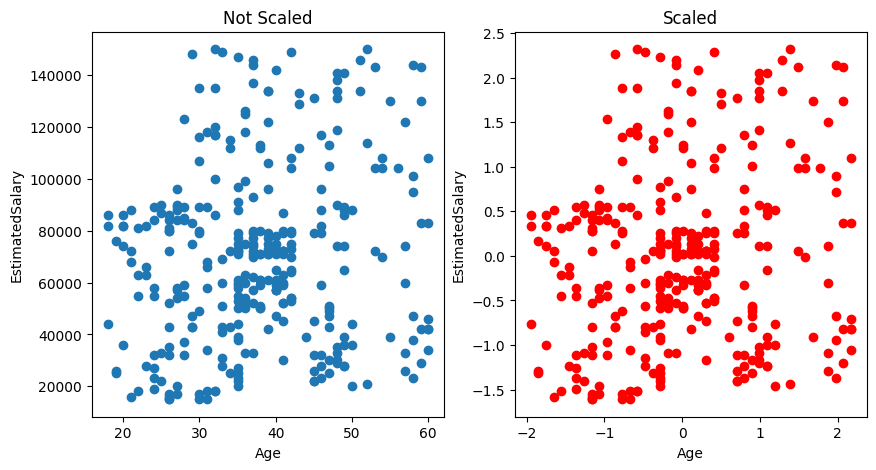

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Not Scaled')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('Scaled')

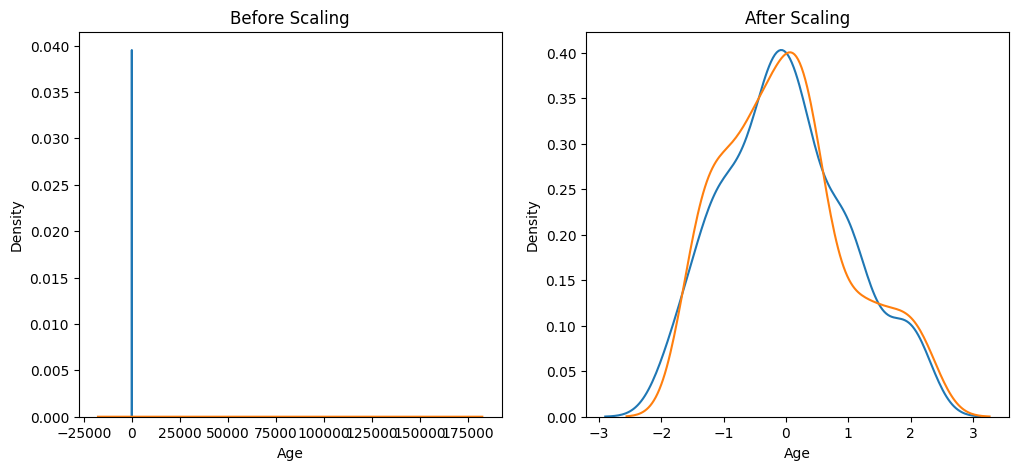

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

#Comparison Of Distribution

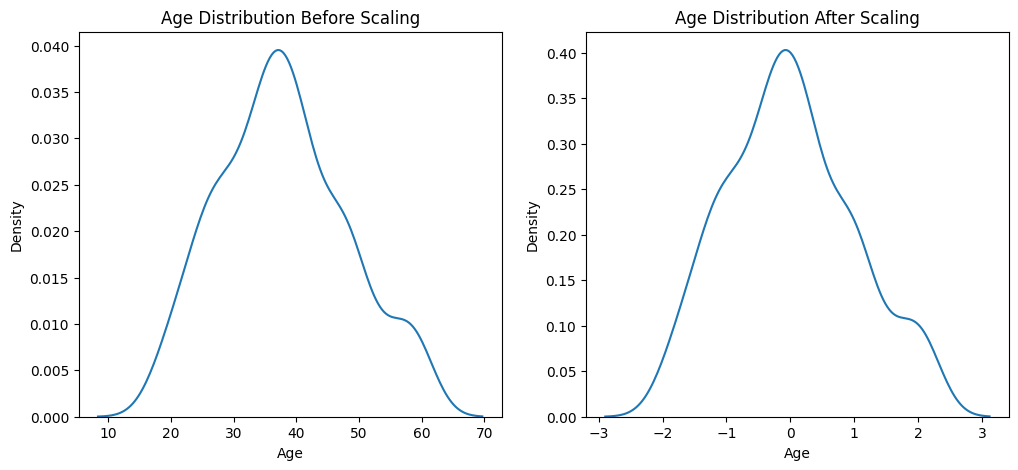

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()


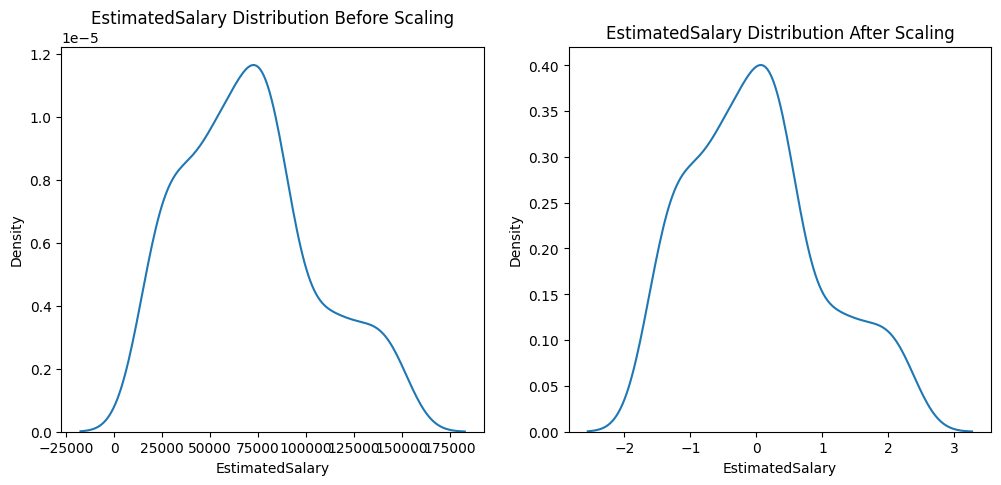

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#before scaling
ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('EstimatedSalary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Why scaling is important ?**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
# Train model
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy (unscaled):", accuracy_score(y_test, y_pred))
print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))


Accuracy (unscaled): 0.8875
Accuracy (scaled): 0.8625


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipe, X, y, cv=5)

print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9600000000000002


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [ ]:
print("Accuracy (unscaled):", accuracy_score(y_test, y_pred))
print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))

Accuracy (unscaled): 0.8375
Accuracy (scaled): 0.8375


In [ ]:
df1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Effects of outliers

In [ ]:
outliers_df = pd.DataFrame({
    "Age": [5, 8, 90, 95, 100],                 # age outliers
    "EstimatedSalary": [2000, 5000, 300000, 500000, 1000000],  # salary outliers
    "Purchased": [0, 0, 1, 1, 1]
})

df1 = pd.concat([df1, outliers_df], ignore_index=True)


In [ ]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
400,5,2000,0
401,8,5000,0
402,90,300000,1
403,95,500000,1


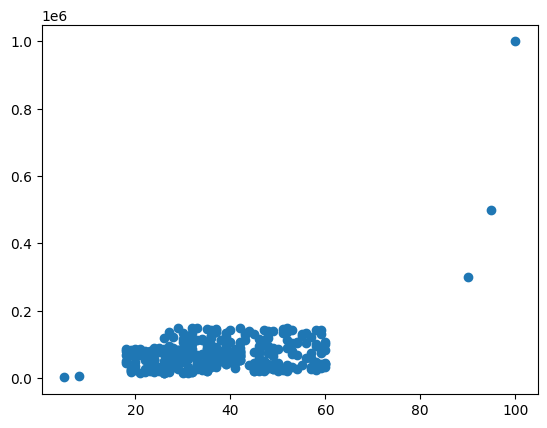

In [ ]:
plt.scatter(df1['Age'], df1['EstimatedSalary'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop('Purchased', axis=1),
    df1['Purchased'],
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape

((324, 2), (81, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

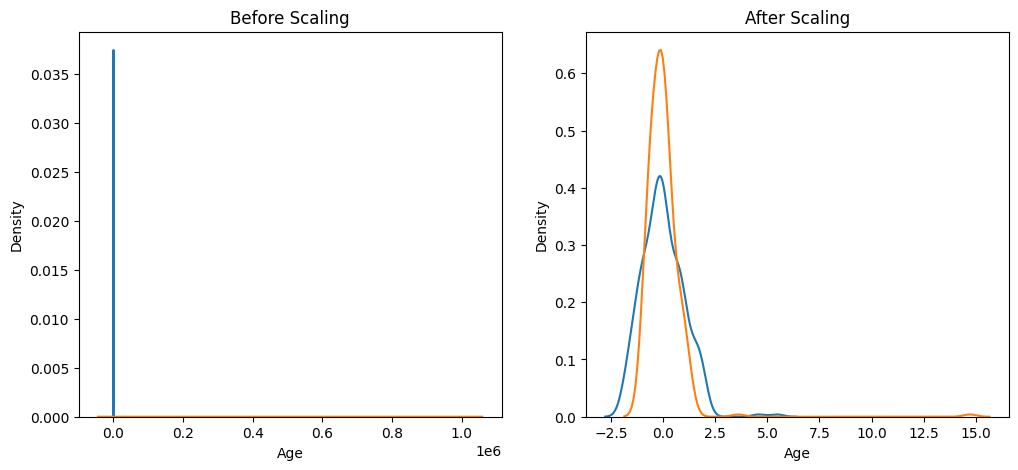

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()


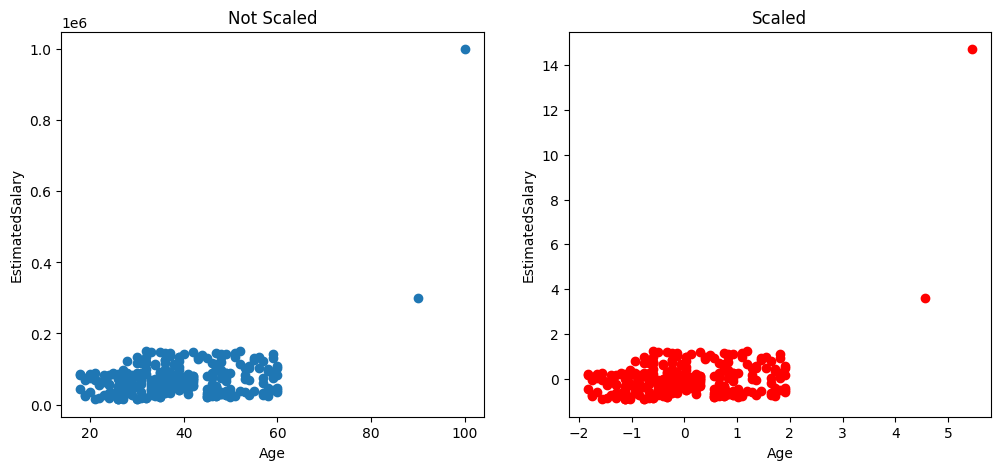

In [ ]:
fig ,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Not Scaled')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('Scaled')
plt.show()